In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/11_Nov.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,20.000000,81.000000,1,4,1,1943.0,1963.0,2051.0,1852.0,1803.0,1981.0,1951.416667,1867.0
1,19.916667,81.000000,1,4,1,1889.0,1975.0,2036.0,1828.0,1781.0,1976.0,1933.750000,1824.0
2,19.833333,81.000000,1,4,1,1901.0,1990.0,2012.0,1764.0,1755.0,1935.0,1916.750000,1808.0
3,19.750000,81.000000,1,4,1,1887.0,1977.0,1977.0,1802.0,1760.0,1941.0,1902.416667,1805.0
4,19.666667,81.000000,2,4,1,1867.0,1943.0,1963.0,1788.0,1740.0,1913.0,1888.916667,1801.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,13.432452,78.354324,23,7,0,1672.0,1762.0,1868.0,1657.0,1676.0,1644.0,1709.083333,1600.0
8636,13.432452,78.354324,24,7,0,1634.0,1746.0,1826.0,1630.0,1645.0,1619.0,1687.833333,1571.0
8637,13.432452,78.354324,24,7,0,1643.0,1722.0,1801.0,1613.0,1620.0,1603.0,1666.500000,1545.0
8638,13.100000,78.354324,24,7,0,1608.0,1699.0,1796.0,1598.0,1594.0,1583.0,1645.916667,1549.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 4800][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.338113,0.300581,0.738842,-1.660674,-0.010075,0.654556,0.627494,0.703938,1.039060,0.269868,0.059076,0.687580,0.690287
1,0.174436,0.278981,0.738842,-1.660674,-0.010075,0.654556,0.421946,0.749615,0.981972,0.179003,-0.023053,0.669084,0.619921
2,0.113533,0.257381,0.738842,-1.660674,-0.010075,0.654556,0.467623,0.806711,0.890631,-0.063306,-0.120116,0.517414,0.552210
3,0.102114,0.235781,0.738842,-1.660674,-0.010075,0.654556,0.414333,0.757227,0.757425,0.080565,-0.101450,0.539610,0.495120
4,0.086888,0.214181,0.738842,-1.516238,-0.010075,0.654556,0.338204,0.627810,0.704143,0.027560,-0.176114,0.436031,0.441349


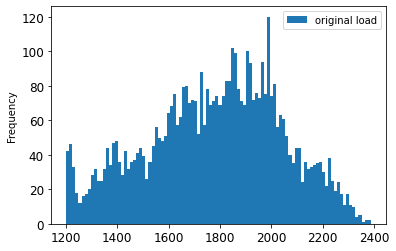

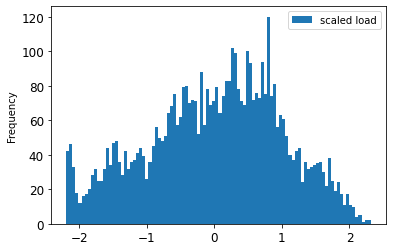

In [9]:
stlf_data[stlf_data.index <= 4800][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 4800][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

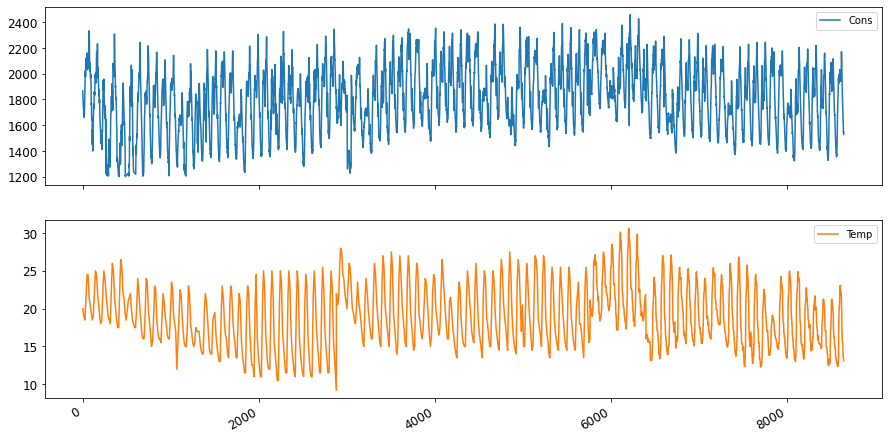

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+1'] = train_shifted['Cons'].shift(-1)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
0,0.338113,0.300581,0.738842,-1.660674,-0.010075,0.654556,0.627494,0.703938,1.039060,0.269868,0.059076,0.687580,0.690287,0.174436
1,0.174436,0.278981,0.738842,-1.660674,-0.010075,0.654556,0.421946,0.749615,0.981972,0.179003,-0.023053,0.669084,0.619921,0.113533
2,0.113533,0.257381,0.738842,-1.660674,-0.010075,0.654556,0.467623,0.806711,0.890631,-0.063306,-0.120116,0.517414,0.552210,0.102114
3,0.102114,0.235781,0.738842,-1.660674,-0.010075,0.654556,0.414333,0.757227,0.757425,0.080565,-0.101450,0.539610,0.495120,0.086888
4,0.086888,0.214181,0.738842,-1.516238,-0.010075,0.654556,0.338204,0.627810,0.704143,0.027560,-0.176114,0.436031,0.441349,-0.031112
5,-0.031112,0.192581,0.738842,-1.516238,-0.010075,0.654556,0.174527,0.422264,0.749813,-0.108739,-0.276909,0.350948,0.373306,-0.076789
6,-0.076789,0.170982,0.738842,-1.516238,-0.010075,0.654556,0.113624,0.467941,0.806902,-0.104953,-0.261977,0.299158,0.296301,-0.130079
7,-0.130079,0.149382,0.738842,-1.516238,-0.010075,0.654556,0.102205,0.414651,0.757425,-0.112525,-0.336640,0.221474,0.218965,-0.190982
8,-0.190982,0.127782,0.738842,-1.371801,-0.010075,0.654556,0.086979,0.338523,0.628025,-0.154172,-0.385171,0.188181,0.147603,-0.251885
9,-0.251885,0.106182,0.738842,-1.371801,-0.010075,0.654556,-0.031020,0.174848,0.422507,-0.210963,-0.433703,0.128993,0.088853,-0.255691


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,0.338113,0.300581,0.738842,-1.660674,-0.010075,0.654556,0.627494,0.703938,1.039060,0.269868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338113
1,0.174436,0.278981,0.738842,-1.660674,-0.010075,0.654556,0.421946,0.749615,0.981972,0.179003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338113,0.174436
2,0.113533,0.257381,0.738842,-1.660674,-0.010075,0.654556,0.467623,0.806711,0.890631,-0.063306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.338113,0.174436,0.113533
3,0.102114,0.235781,0.738842,-1.660674,-0.010075,0.654556,0.414333,0.757227,0.757425,0.080565,...,NaN,NaN,NaN,NaN,NaN,NaN,0.338113,0.174436,0.113533,0.102114
4,0.086888,0.214181,0.738842,-1.516238,-0.010075,0.654556,0.338204,0.627810,0.704143,0.027560,...,NaN,NaN,NaN,NaN,NaN,0.338113,0.174436,0.113533,0.102114,0.086888
5,-0.031112,0.192581,0.738842,-1.516238,-0.010075,0.654556,0.174527,0.422264,0.749813,-0.108739,...,NaN,NaN,NaN,NaN,0.338113,0.174436,0.113533,0.102114,0.086888,-0.031112
6,-0.076789,0.170982,0.738842,-1.516238,-0.010075,0.654556,0.113624,0.467941,0.806902,-0.104953,...,NaN,NaN,NaN,0.338113,0.174436,0.113533,0.102114,0.086888,-0.031112,-0.076789
7,-0.130079,0.149382,0.738842,-1.516238,-0.010075,0.654556,0.102205,0.414651,0.757425,-0.112525,...,NaN,NaN,0.338113,0.174436,0.113533,0.102114,0.086888,-0.031112,-0.076789,-0.130079
8,-0.190982,0.127782,0.738842,-1.371801,-0.010075,0.654556,0.086979,0.338523,0.628025,-0.154172,...,NaN,0.338113,0.174436,0.113533,0.102114,0.086888,-0.031112,-0.076789,-0.130079,-0.190982
9,-0.251885,0.106182,0.738842,-1.371801,-0.010075,0.654556,-0.031020,0.174848,0.422507,-0.210963,...,0.338113,0.174436,0.113533,0.102114,0.086888,-0.031112,-0.076789,-0.130079,-0.190982,-0.251885


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-0.255691,0.084582,0.738842,-1.371801,-0.010075,0.654556,-0.076698,0.113946,0.468178,-0.241252,...,0.174436,0.113533,0.102114,0.086888,-0.031112,-0.076789,-0.130079,-0.190982,-0.251885,-0.255691
11,-0.282336,0.062982,0.738842,-1.371801,-0.010075,0.654556,-0.129988,0.102527,0.414896,-0.267754,...,0.113533,0.102114,0.086888,-0.031112,-0.076789,-0.130079,-0.190982,-0.251885,-0.255691,-0.282336
12,-0.301369,0.041382,0.738842,-1.227365,-0.010075,0.654556,-0.190891,0.087301,0.338778,-0.335904,...,0.102114,0.086888,-0.031112,-0.076789,-0.130079,-0.190982,-0.251885,-0.255691,-0.282336,-0.301369
13,-0.339433,0.030582,0.758443,-1.227365,-0.010075,0.654556,-0.251794,-0.030697,0.175125,-0.373764,...,0.086888,-0.031112,-0.076789,-0.130079,-0.190982,-0.251885,-0.255691,-0.282336,-0.301369,-0.339433
14,-0.331820,0.019782,0.778044,-1.227365,-0.010075,0.654556,-0.255600,-0.076374,0.114231,-0.388909,...,-0.031112,-0.076789,-0.130079,-0.190982,-0.251885,-0.255691,-0.282336,-0.301369,-0.339433,-0.331820


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4790 entries, 10 to 4799
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  4790 non-null   float64
 1   Temp           4790 non-null   float64
 2   Hum            4790 non-null   float64
 3   A              4790 non-null   float64
 4   B              4790 non-null   float64
 5   C              4790 non-null   float64
 6   D              4790 non-null   float64
 7   E              4790 non-null   float64
 8   F              4790 non-null   float64
 9   G              4790 non-null   float64
 10  H              4790 non-null   float64
 11  I              4790 non-null   float64
 12  J              4790 non-null   float64
 13  y_t+1          4790 non-null   float64
 14  Cons_t-10      4790 non-null   float64
 15  Cons_t-9       4790 non-null   float64
 16  Cons_t-8       4790 non-null   float64
 17  Cons_t-7       4790 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+1']]
y_train


,y_t+1
10,-0.282336
11,-0.301369
12,-0.339433
13,-0.331820
14,-0.373691
...,...
4795,0.692112
4796,0.642628
4797,0.547467
4798,0.387597


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-0.255691,-0.255691,-0.251885,-0.190982,-0.130079,-0.076789,-0.031112,0.086888,0.102114,0.113533,...,-1.371801,-0.010075,0.654556,-0.076698,0.113946,0.468178,-0.241252,-0.426236,0.110496,0.025789
11,-0.282336,-0.282336,-0.255691,-0.251885,-0.190982,-0.130079,-0.076789,-0.031112,0.086888,0.102114,...,-1.371801,-0.010075,0.654556,-0.129988,0.102527,0.414896,-0.267754,-0.497166,0.128993,-0.034952
12,-0.301369,-0.301369,-0.282336,-0.255691,-0.251885,-0.190982,-0.130079,-0.076789,-0.031112,0.086888,...,-1.227365,-0.010075,0.654556,-0.190891,0.087301,0.338778,-0.335904,-0.463568,0.062406,-0.090714
13,-0.339433,-0.339433,-0.301369,-0.282336,-0.255691,-0.251885,-0.190982,-0.130079,-0.076789,-0.031112,...,-1.227365,-0.010075,0.654556,-0.251794,-0.030697,0.175125,-0.373764,-0.459835,0.073504,-0.135523
14,-0.331820,-0.331820,-0.339433,-0.301369,-0.282336,-0.255691,-0.251885,-0.190982,-0.130079,-0.076789,...,-1.227365,-0.010075,0.654556,-0.255600,-0.076374,0.114231,-0.388909,-0.556897,0.018015,-0.174357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,0.726370,0.726370,0.768240,0.536048,0.475145,0.463725,0.600757,0.570306,0.753015,0.871014,...,1.516930,-0.513946,0.654556,0.463817,0.871419,1.286443,0.709053,-0.071585,0.288061,0.765300
4796,0.692112,0.692112,0.726370,0.768240,0.536048,0.475145,0.463725,0.600757,0.570306,0.753015,...,1.661366,-0.513946,0.654556,0.475236,0.753421,1.164655,0.667406,-0.067851,0.169685,0.724143
4797,0.642628,0.642628,0.692112,0.726370,0.768240,0.536048,0.475145,0.463725,0.600757,0.570306,...,1.661366,-0.513946,0.654556,0.536139,0.570714,1.016225,0.542466,-0.120116,0.025414,0.691615
4798,0.547467,0.547467,0.642628,0.692112,0.726370,0.768240,0.536048,0.475145,0.463725,0.600757,...,1.661366,-0.513946,0.654556,0.768332,0.601165,0.829737,0.398595,-0.258243,-0.044872,0.667053


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(4790, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(4790,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=4801) & (stlf_data.index <5760)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,1810.0,17.833333,62.666667,1.0,4.0,1.0,1947.0,1919.0,1928.0,1761.0,1613.0,1696.0,1914.000000
4802,1793.0,17.666667,63.333333,1.0,4.0,1.0,1922.0,1980.0,1936.0,1768.0,1622.0,1695.0,1902.083333
4803,1787.0,17.500000,64.000000,1.0,4.0,1.0,1880.0,1969.0,1900.0,1749.0,1612.0,1701.0,1892.666667
4804,1774.0,17.333333,64.666667,2.0,4.0,1.0,1842.0,1960.0,1903.0,1731.0,1587.0,1680.0,1881.916667
4805,1751.0,17.166667,65.333333,2.0,4.0,1.0,1810.0,1947.0,1919.0,1722.0,1571.0,1645.0,1867.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755,1792.0,15.818182,73.083333,23.0,6.0,1.0,1690.0,1815.0,1940.0,1851.0,1862.0,1880.0,1783.750000
5756,1769.0,15.863636,73.666667,24.0,6.0,1.0,1706.0,1786.0,1866.0,1846.0,1854.0,1846.0,1775.666667
5757,1737.0,15.909091,74.250000,24.0,6.0,1.0,1760.0,1772.0,1869.0,1804.0,1818.0,1824.0,1764.666667
5758,1695.0,15.954545,74.833333,24.0,6.0,1.0,1798.0,1712.0,1839.0,1748.0,1786.0,1782.0,1752.666667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
4801,-0.277726,-0.420433,0.279990,-1.664588,-0.167533,0.655141,0.323487,0.196383,0.233035,-0.525369,-1.189823,-0.781554,0.187253
4802,-0.352698,-0.463396,0.324828,-1.664588,-0.167533,0.655141,0.213131,0.465718,0.268383,-0.494017,-1.149687,-0.786132,0.131433
4803,-0.379159,-0.506360,0.369666,-1.664588,-0.167533,0.655141,0.027733,0.417150,0.109316,-0.579117,-1.194283,-0.758663,0.087324
4804,-0.436491,-0.549324,0.414504,-1.519992,-0.167533,0.655141,-0.140008,0.377412,0.122572,-0.659737,-1.305774,-0.854806,0.036969
4805,-0.537925,-0.592288,0.459341,-1.519992,-0.167533,0.655141,-0.281264,0.320012,0.193268,-0.700047,-1.377129,-1.015046,-0.028609
4806,-0.626129,-0.635252,0.504179,-1.519992,-0.167533,0.655141,-0.356306,0.209629,0.462798,-0.610469,-1.310234,-0.928059,-0.125805
4807,-0.687871,-0.678216,0.549017,-1.519992,-0.167533,0.655141,-0.382792,0.024185,0.414194,-0.691090,-1.417265,-1.010468,-0.224172
4808,-0.758434,-0.721180,0.593854,-1.375396,-0.167533,0.655141,-0.440177,-0.143597,0.374428,-0.744837,-1.435104,-1.037938,-0.325272
4809,-0.789305,-0.764144,0.638692,-1.375396,-0.167533,0.655141,-0.541704,-0.284888,0.316987,-1.044924,-1.439564,-1.120347,-0.424029
4810,-0.828996,-0.807108,0.683530,-1.375396,-0.167533,0.655141,-0.629989,-0.359948,0.206524,-0.838894,-1.537676,-1.198178,-0.516541


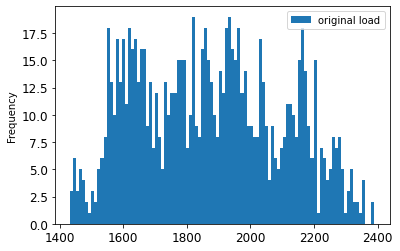

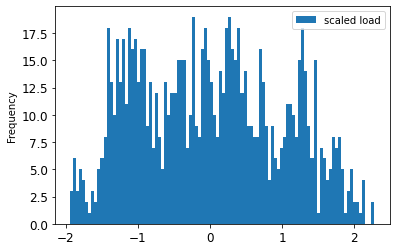

In [21]:
stlf_data[(stlf_data.index >=4801) & (stlf_data.index <=5760)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=4801) & (valid.index <=5760)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+1'] = valid_shifted['Cons'].shift(-1)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
4801,-0.277726,-0.420433,0.279990,-1.664588,-0.167533,0.655141,0.323487,0.196383,0.233035,-0.525369,-1.189823,-0.781554,0.187253,-0.352698
4802,-0.352698,-0.463396,0.324828,-1.664588,-0.167533,0.655141,0.213131,0.465718,0.268383,-0.494017,-1.149687,-0.786132,0.131433,-0.379159
4803,-0.379159,-0.506360,0.369666,-1.664588,-0.167533,0.655141,0.027733,0.417150,0.109316,-0.579117,-1.194283,-0.758663,0.087324,-0.436491
4804,-0.436491,-0.549324,0.414504,-1.519992,-0.167533,0.655141,-0.140008,0.377412,0.122572,-0.659737,-1.305774,-0.854806,0.036969,-0.537925
4805,-0.537925,-0.592288,0.459341,-1.519992,-0.167533,0.655141,-0.281264,0.320012,0.193268,-0.700047,-1.377129,-1.015046,-0.028609,-0.626129
4806,-0.626129,-0.635252,0.504179,-1.519992,-0.167533,0.655141,-0.356306,0.209629,0.462798,-0.610469,-1.310234,-0.928059,-0.125805,-0.687871
4807,-0.687871,-0.678216,0.549017,-1.519992,-0.167533,0.655141,-0.382792,0.024185,0.414194,-0.691090,-1.417265,-1.010468,-0.224172,-0.758434
4808,-0.758434,-0.721180,0.593854,-1.375396,-0.167533,0.655141,-0.440177,-0.143597,0.374428,-0.744837,-1.435104,-1.037938,-0.325272,-0.789305
4809,-0.789305,-0.764144,0.638692,-1.375396,-0.167533,0.655141,-0.541704,-0.284888,0.316987,-1.044924,-1.439564,-1.120347,-0.424029,-0.828996
4810,-0.828996,-0.807108,0.683530,-1.375396,-0.167533,0.655141,-0.629989,-0.359948,0.206524,-0.838894,-1.537676,-1.198178,-0.516541,-0.890739


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4801,-0.277726,-0.420433,0.279990,-1.664588,-0.167533,0.655141,0.323487,0.196383,0.233035,-0.525369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277726
4802,-0.352698,-0.463396,0.324828,-1.664588,-0.167533,0.655141,0.213131,0.465718,0.268383,-0.494017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277726,-0.352698
4803,-0.379159,-0.506360,0.369666,-1.664588,-0.167533,0.655141,0.027733,0.417150,0.109316,-0.579117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277726,-0.352698,-0.379159
4804,-0.436491,-0.549324,0.414504,-1.519992,-0.167533,0.655141,-0.140008,0.377412,0.122572,-0.659737,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.277726,-0.352698,-0.379159,-0.436491
4805,-0.537925,-0.592288,0.459341,-1.519992,-0.167533,0.655141,-0.281264,0.320012,0.193268,-0.700047,...,NaN,NaN,NaN,NaN,NaN,-0.277726,-0.352698,-0.379159,-0.436491,-0.537925
4806,-0.626129,-0.635252,0.504179,-1.519992,-0.167533,0.655141,-0.356306,0.209629,0.462798,-0.610469,...,NaN,NaN,NaN,NaN,-0.277726,-0.352698,-0.379159,-0.436491,-0.537925,-0.626129
4807,-0.687871,-0.678216,0.549017,-1.519992,-0.167533,0.655141,-0.382792,0.024185,0.414194,-0.691090,...,NaN,NaN,NaN,-0.277726,-0.352698,-0.379159,-0.436491,-0.537925,-0.626129,-0.687871
4808,-0.758434,-0.721180,0.593854,-1.375396,-0.167533,0.655141,-0.440177,-0.143597,0.374428,-0.744837,...,NaN,NaN,-0.277726,-0.352698,-0.379159,-0.436491,-0.537925,-0.626129,-0.687871,-0.758434
4809,-0.789305,-0.764144,0.638692,-1.375396,-0.167533,0.655141,-0.541704,-0.284888,0.316987,-1.044924,...,NaN,-0.277726,-0.352698,-0.379159,-0.436491,-0.537925,-0.626129,-0.687871,-0.758434,-0.789305
4810,-0.828996,-0.807108,0.683530,-1.375396,-0.167533,0.655141,-0.629989,-0.359948,0.206524,-0.838894,...,-0.277726,-0.352698,-0.379159,-0.436491,-0.537925,-0.626129,-0.687871,-0.758434,-0.789305,-0.828996


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
4811,-0.890739,-0.850072,0.728368,-1.375396,-0.167533,0.655141,-0.691789,-0.386440,0.020945,-0.991177,...,-0.352698,-0.379159,-0.436491,-0.537925,-0.626129,-0.687871,-0.758434,-0.789305,-0.828996,-0.890739
4812,-0.886328,-0.893035,0.773205,-1.230800,-0.167533,0.655141,-0.762417,-0.443840,-0.146959,-0.964304,...,-0.379159,-0.436491,-0.537925,-0.626129,-0.687871,-0.758434,-0.789305,-0.828996,-0.890739,-0.886328
4813,-0.939250,-0.925258,0.790020,-1.230800,-0.167533,0.655141,-0.793316,-0.545392,-0.288352,-0.968783,...,-0.436491,-0.537925,-0.626129,-0.687871,-0.758434,-0.789305,-0.828996,-0.890739,-0.886328,-0.939250
4814,-0.961301,-0.957481,0.806834,-1.230800,-0.167533,0.655141,-0.833044,-0.633699,-0.363467,-0.919515,...,-0.537925,-0.626129,-0.687871,-0.758434,-0.789305,-0.828996,-0.890739,-0.886328,-0.939250,-0.961301
4815,-0.961301,-0.989704,0.823648,-1.230800,-0.167533,0.655141,-0.894844,-0.695513,-0.389978,-0.941909,...,-0.626129,-0.687871,-0.758434,-0.789305,-0.828996,-0.890739,-0.886328,-0.939250,-0.961301,-0.961301


In [25]:
y_valid = valid_shifted[['y_t+1']]
y_valid


,y_t+1
4811,-0.886328
4812,-0.939250
4813,-0.961301
4814,-0.961301
4815,-0.983352
...,...
5754,-0.357108
5755,-0.458542
5756,-0.599668
5757,-0.784895


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
4811,-0.890739,-0.890739,-0.828996,-0.789305,-0.758434,-0.687871,-0.626129,-0.537925,-0.436491,-0.379159,...,-1.375396,-0.167533,0.655141,-0.691789,-0.386440,0.020945,-0.991177,-1.488620,-1.253117,-0.598124
4812,-0.886328,-0.886328,-0.890739,-0.828996,-0.789305,-0.758434,-0.687871,-0.626129,-0.537925,-0.436491,...,-1.230800,-0.167533,0.655141,-0.762417,-0.443840,-0.146959,-0.964304,-1.528757,-1.436248,-0.664482
4813,-0.939250,-0.939250,-0.886328,-0.890739,-0.828996,-0.789305,-0.758434,-0.687871,-0.626129,-0.537925,...,-1.230800,-0.167533,0.655141,-0.793316,-0.545392,-0.288352,-0.968783,-1.591192,-1.285165,-0.723034
4814,-0.961301,-0.961301,-0.939250,-0.886328,-0.890739,-0.828996,-0.789305,-0.758434,-0.687871,-0.626129,...,-1.230800,-0.167533,0.655141,-0.833044,-0.633699,-0.363467,-0.919515,-1.537676,-1.280587,-0.776902
4815,-0.961301,-0.961301,-0.961301,-0.939250,-0.886328,-0.890739,-0.828996,-0.789305,-0.758434,-0.687871,...,-1.230800,-0.167533,0.655141,-0.894844,-0.695513,-0.389978,-0.941909,-1.551055,-1.335526,-0.828428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5754,-0.330647,-0.330647,-0.498234,-0.736383,-0.806945,-0.709922,-0.445312,-0.383569,-0.255675,-0.149831,...,1.516524,0.948193,0.655141,-0.713860,-0.156843,0.409776,-0.207366,-0.097210,0.037958,-0.365087
5755,-0.357108,-0.357108,-0.330647,-0.498234,-0.736383,-0.806945,-0.709922,-0.445312,-0.383569,-0.255675,...,1.516524,0.948193,0.655141,-0.810973,-0.262811,0.286057,-0.122267,-0.079371,0.060850,-0.422858
5756,-0.458542,-0.458542,-0.357108,-0.330647,-0.498234,-0.736383,-0.806945,-0.709922,-0.445312,-0.383569,...,1.661120,0.948193,0.655141,-0.740345,-0.390856,-0.040914,-0.144661,-0.115049,-0.094812,-0.460722
5757,-0.599668,-0.599668,-0.458542,-0.357108,-0.330647,-0.498234,-0.736383,-0.806945,-0.709922,-0.445312,...,1.661120,0.948193,0.655141,-0.501976,-0.452670,-0.027658,-0.332776,-0.275596,-0.195534,-0.512247


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(948, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(948,2,1,12)
print(X_valid.shape)

(948, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(128,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 149,889
Trainable params: 149,889
Non-trainable params: 0
__________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
16/16 [==============================] - 1s 49ms/step - loss: 0.2756 - val_loss: 0.1046
Epoch 2/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0656 - val_loss: 0.0551
Epoch 3/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0327 - val_loss: 0.0316
Epoch 4/300
16/16 [==============================] - 0s 23ms/step - loss: 0.0220 - val_loss: 0.0241
Epoch 5/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0188 - val_loss: 0.0221
Epoch 6/300
16/16 [==============================] - 0s 22ms/step - loss: 0.0170 - val_loss: 0.0206
Epoch 7/300
16/16 [==============================] - 0s 21ms/step - loss: 0.0166 - val_loss: 0.0201
Epoch 8/300
16/16 [==============================] - 0s 19ms/step - loss: 0.0152 - val_loss: 0.0190
Epoch 9/300
16/16 [==============================] - 0s 23ms/step - loss: 0.0153 - val_loss: 0.0206
Epoch 10/300
16/16 [==============================] - 0s 20ms/step - loss: 0.0159 - val_loss: 0.0187

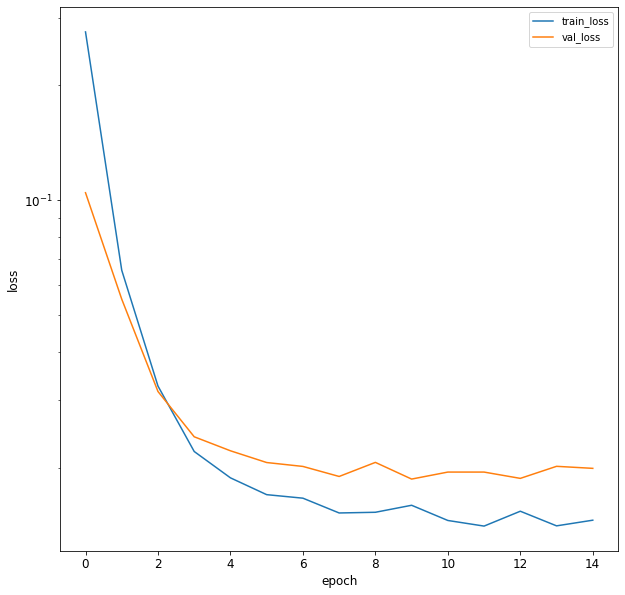

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[stlf_data.index >= 5761][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
5761,2001.0,21.132450,84.049360,1.0,6.0,1.0,2082.0,2153.0,2189.0,2021.0,1707.0,2057.0,2108.166667
5762,1980.0,20.597450,86.606595,1.0,6.0,1.0,2087.0,2141.0,2183.0,1998.0,1685.0,2050.0,2091.250000
5763,1984.0,20.062450,89.163830,1.0,6.0,1.0,2048.0,2138.0,2176.0,2001.0,1693.0,2052.0,2075.250000
5764,1935.0,20.062450,89.163830,2.0,6.0,1.0,2032.0,2114.0,2143.0,1976.0,1666.0,2010.0,2057.916667
5765,1936.0,20.062450,89.163830,2.0,6.0,1.0,2001.0,2082.0,2153.0,1981.0,1668.0,2008.0,2039.833333
5766,1908.0,20.027450,90.093027,2.0,6.0,1.0,1980.0,2087.0,2141.0,1956.0,1649.0,2002.0,2020.416667
5767,1894.0,19.992450,91.022224,2.0,6.0,1.0,1984.0,2048.0,2138.0,1952.0,1639.0,1978.0,2000.083333
5768,1883.0,19.992450,91.022224,3.0,6.0,1.0,1935.0,2032.0,2114.0,1948.0,1631.0,1970.0,1980.833333
5769,1880.0,19.992450,91.022224,3.0,6.0,1.0,1936.0,2001.0,2082.0,1936.0,1615.0,1931.0,1964.000000
5770,1882.0,19.962450,89.365547,3.0,6.0,1.0,1908.0,1980.0,2087.0,1933.0,1608.0,1951.0,1946.916667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 5761 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    2879 non-null   float64
 1   Temp    2879 non-null   float64
 2   Hum     2879 non-null   float64
 3   A       2879 non-null   float64
 4   B       2879 non-null   float64
 5   C       2879 non-null   float64
 6   D       2879 non-null   float64
 7   E       2879 non-null   float64
 8   F       2879 non-null   float64
 9   G       2879 non-null   float64
 10  H       2879 non-null   float64
 11  I       2879 non-null   float64
 12  J       2879 non-null   float64
dtypes: float64(13)
memory usage: 314.9 KB


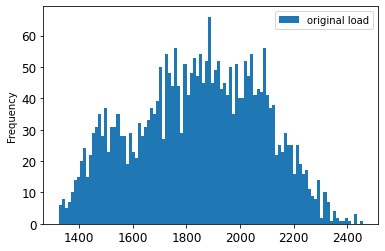

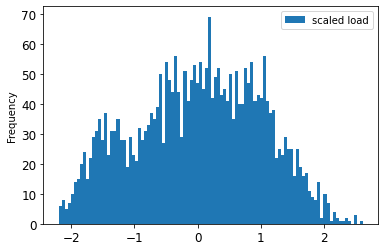

In [36]:
stlf_data[stlf_data.index >= 5761][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[test.index >=5761][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+1'] = test_shifted['Cons'].shift(-1)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+1
5761,0.674400,0.449041,0.703524,-1.662410,0.901439,0.707291,1.015623,1.313454,1.461872,0.691170,-0.633330,0.763256,1.180154,0.585274
5762,0.585274,0.317927,0.854869,-1.662410,0.901439,0.707291,1.036854,1.262524,1.436436,0.595330,-0.724543,0.734545,1.104844,0.602250
5763,0.602250,0.186814,1.006214,-1.662410,0.901439,0.707291,0.871255,1.249791,1.406760,0.607831,-0.691375,0.742748,1.033615,0.394289
5764,0.394289,0.186814,1.006214,-1.517903,0.901439,0.707291,0.803318,1.147932,1.266860,0.503657,-0.803318,0.570481,0.956450,0.398533
5765,0.398533,0.186814,1.006214,-1.517903,0.901439,0.707291,0.671688,1.012118,1.309254,0.524492,-0.795026,0.562278,0.875947,0.279699
5766,0.279699,0.178237,1.061207,-1.517903,0.901439,0.707291,0.582520,1.033339,1.258381,0.420318,-0.873801,0.537669,0.789507,0.220281
5767,0.220281,0.169659,1.116200,-1.517903,0.901439,0.707291,0.599504,0.867817,1.245663,0.403650,-0.915261,0.439230,0.698987,0.173596
5768,0.173596,0.169659,1.116200,-1.373396,0.901439,0.707291,0.391445,0.799911,1.143917,0.386982,-0.948430,0.406418,0.613290,0.160864
5769,0.160864,0.169659,1.116200,-1.373396,0.901439,0.707291,0.395691,0.668342,1.008256,0.336979,-1.014766,0.246455,0.538351,0.169352
5770,0.169352,0.162307,1.018153,-1.373396,0.901439,0.707291,0.276800,0.579214,1.029453,0.324478,-1.043789,0.328487,0.462299,0.156620


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5761,0.674400,0.449041,0.703524,-1.662410,0.901439,0.707291,1.015623,1.313454,1.461872,0.691170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674400
5762,0.585274,0.317927,0.854869,-1.662410,0.901439,0.707291,1.036854,1.262524,1.436436,0.595330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674400,0.585274
5763,0.602250,0.186814,1.006214,-1.662410,0.901439,0.707291,0.871255,1.249791,1.406760,0.607831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.674400,0.585274,0.602250
5764,0.394289,0.186814,1.006214,-1.517903,0.901439,0.707291,0.803318,1.147932,1.266860,0.503657,...,NaN,NaN,NaN,NaN,NaN,NaN,0.674400,0.585274,0.602250,0.394289
5765,0.398533,0.186814,1.006214,-1.517903,0.901439,0.707291,0.671688,1.012118,1.309254,0.524492,...,NaN,NaN,NaN,NaN,NaN,0.674400,0.585274,0.602250,0.394289,0.398533
5766,0.279699,0.178237,1.061207,-1.517903,0.901439,0.707291,0.582520,1.033339,1.258381,0.420318,...,NaN,NaN,NaN,NaN,0.674400,0.585274,0.602250,0.394289,0.398533,0.279699
5767,0.220281,0.169659,1.116200,-1.517903,0.901439,0.707291,0.599504,0.867817,1.245663,0.403650,...,NaN,NaN,NaN,0.674400,0.585274,0.602250,0.394289,0.398533,0.279699,0.220281
5768,0.173596,0.169659,1.116200,-1.373396,0.901439,0.707291,0.391445,0.799911,1.143917,0.386982,...,NaN,NaN,0.674400,0.585274,0.602250,0.394289,0.398533,0.279699,0.220281,0.173596
5769,0.160864,0.169659,1.116200,-1.373396,0.901439,0.707291,0.395691,0.668342,1.008256,0.336979,...,NaN,0.674400,0.585274,0.602250,0.394289,0.398533,0.279699,0.220281,0.173596,0.160864
5770,0.169352,0.162307,1.018153,-1.373396,0.901439,0.707291,0.276800,0.579214,1.029453,0.324478,...,0.6744,0.585274,0.602250,0.394289,0.398533,0.279699,0.220281,0.173596,0.160864,0.169352


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
5771,0.156620,0.154955,0.920105,-1.373396,0.901439,0.707291,0.217355,0.596191,0.864117,0.224471,...,0.585274,0.602250,0.394289,0.398533,0.279699,0.220281,0.173596,0.160864,0.169352,0.156620
5772,0.126911,0.154955,0.920105,-1.228889,0.901439,0.707291,0.170647,0.388227,0.796286,0.216137,...,0.602250,0.394289,0.398533,0.279699,0.220281,0.173596,0.160864,0.169352,0.156620,0.126911
5773,0.008076,0.154955,0.920105,-1.228889,0.901439,0.707291,0.157909,0.392471,0.664865,0.236972,...,0.394289,0.398533,0.279699,0.220281,0.173596,0.160864,0.169352,0.156620,0.126911,0.008076
5774,0.029297,0.125547,0.957370,-1.228889,0.901439,0.707291,0.166401,0.273635,0.575838,0.174467,...,0.398533,0.279699,0.220281,0.173596,0.160864,0.169352,0.156620,0.126911,0.008076,0.029297
5775,0.003832,0.096138,0.994634,-1.228889,0.901439,0.707291,0.153663,0.214217,0.592795,0.120297,...,0.279699,0.220281,0.173596,0.160864,0.169352,0.156620,0.126911,0.008076,0.029297,0.003832


In [40]:
y_test = test_shifted[['y_t+1']]
y_test

,y_t+1
5771,0.126911
5772,0.008076
5773,0.029297
5774,0.003832
5775,-0.004656
...,...
8634,-1.027484
8635,-1.150563
8636,-1.260910
8637,-1.243933


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
5771,0.156620,0.156620,0.169352,0.160864,0.173596,0.220281,0.279699,0.398533,0.394289,0.602250,...,-1.373396,0.901439,0.707291,0.217355,0.596191,0.864117,0.224471,-0.989890,0.275167,0.399603
5772,0.126911,0.126911,0.156620,0.169352,0.160864,0.173596,0.220281,0.279699,0.398533,0.394289,...,-1.228889,0.901439,0.707291,0.170647,0.388227,0.796286,0.216137,-0.998182,0.287471,0.340246
5773,0.008076,0.008076,0.126911,0.156620,0.169352,0.160864,0.173596,0.220281,0.279699,0.398533,...,-1.228889,0.901439,0.707291,0.157909,0.392471,0.664865,0.236972,-1.023059,0.238252,0.282001
5774,0.029297,0.029297,0.008076,0.126911,0.156620,0.169352,0.160864,0.173596,0.220281,0.279699,...,-1.228889,0.901439,0.707291,0.166401,0.273635,0.575838,0.174467,-1.056227,0.180830,0.233402
5775,0.003832,0.003832,0.029297,0.008076,0.126911,0.156620,0.169352,0.160864,0.173596,0.220281,...,-1.228889,0.901439,0.707291,0.153663,0.214217,0.592795,0.120297,-1.064519,0.139814,0.181093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8634,-0.993531,-0.993531,-0.844988,-0.883185,-0.721909,-0.607318,-0.509704,-0.407846,-0.339940,-0.195641,...,1.516749,1.392962,-1.413845,-0.610637,-0.201711,0.249404,-0.717262,-0.695521,-0.852772,-0.497066
8635,-1.027484,-1.027484,-0.993531,-0.844988,-0.883185,-0.721909,-0.607318,-0.509704,-0.407846,-0.339940,...,1.516749,1.392962,-1.413845,-0.725282,-0.346012,0.101025,-0.825603,-0.761858,-0.930702,-0.596489
8636,-1.150563,-1.150563,-1.027484,-0.993531,-0.844988,-0.883185,-0.721909,-0.607318,-0.509704,-0.407846,...,1.661256,1.392962,-1.413845,-0.886634,-0.413919,-0.077030,-0.938111,-0.890385,-1.033242,-0.691090
8637,-1.260910,-1.260910,-1.150563,-1.027484,-0.993531,-0.844988,-0.883185,-0.721909,-0.607318,-0.509704,...,1.661256,1.392962,-1.413845,-0.848419,-0.515779,-0.183015,-1.008949,-0.994036,-1.098868,-0.786062


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2868, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(2868, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(2868,2,1,12)

In [45]:
predictions = model.predict(X_test)
predictions

array([[ 0.07953968],
       [ 0.05272735],
       [-0.04767492],
       ...,
       [-1.1403439 ],
       [-1.2545972 ],
       [-1.2361774 ]], dtype=float32)

In [46]:
feature=stlf_data.copy()[stlf_data.index >= 5761][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1842.097082
dtype: float64
Cons    235.662138
dtype: float64


In [47]:
load_mean=1842.097082
load_std=235.662138
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+1
5771,1872.005194
5772,1844.000330
5773,1849.001199
5774,1843.000157
5775,1840.999809
...,...
8634,1599.957944
8635,1570.952906
8636,1544.948389
8637,1548.949084


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1860.8416],
       [1854.5228],
       [1830.8618],
       ...,
       [1573.3612],
       [1546.436 ],
       [1550.7769]], dtype=float32)

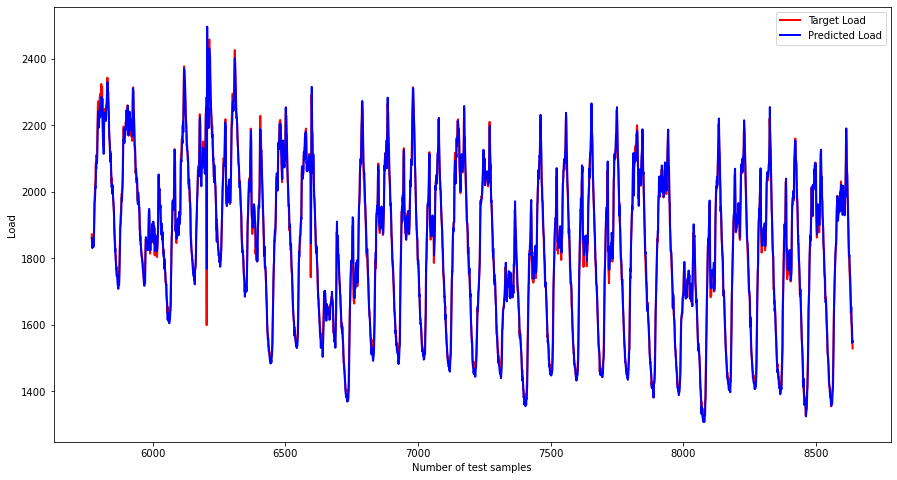

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

1.1230242700236917


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+1    0.092857
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

              y_t+1
5771  187101.115775
5772  184299.462390
5773  184801.100919
5774  184200.347550
5775  184000.401064
...             ...
8634  159895.119595
8635  156993.351249
8636  154392.999845
8637  154795.070652
8638  152793.133116

[2868 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+1
5771  124.626893
5772  110.722941
5773  329.037195
5774   37.415924
5775   59.830822
...          ...
8634  116.552809
8635  928.179561
8636  807.288160
8637    6.315415
8638  476.603288

[2868 rows x 1 columns]
y_t+1    961.951081
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+1    31.015336
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,2868):
    b=a[i]
    print(b)

[1860.8416]
[1854.5228]
[1830.8618]
[1836.8833]
[1833.2648]
[1837.3186]
[1843.0414]
[1834.972]
[1845.6338]
[1883.674]
[1915.8467]
[1969.632]
[1973.8131]
[1992.3025]
[2015.584]
[2012.2192]
[2078.6602]
[2068.697]
[2089.1702]
[2085.9194]
[2089.6914]
[2117.2117]
[2176.728]
[2212.72]
[2241.3442]
[2230.3892]
[2222.3416]
[2193.4553]
[2217.3857]
[2226.01]
[2223.3877]
[2262.0645]
[2257.7332]
[2257.527]
[2225.9111]
[2263.399]
[2270.1025]
[2285.6267]
[2266.8152]
[2251.5156]
[2279.3335]
[2232.429]
[2162.0554]
[2159.8994]
[2136.495]
[2114.0574]
[2180.1873]
[2220.4026]
[2227.739]
[2237.8096]
[2228.9185]
[2223.5076]
[2214.9502]
[2212.7698]
[2226.094]
[2259.6816]
[2260.6426]
[2269.5386]
[2301.5864]
[2329.4353]
[2329.0266]
[2293.9016]
[2300.479]
[2255.1306]
[2239.808]
[2218.0234]
[2164.6982]
[2153.3203]
[2144.5862]
[2108.5044]
[2090.2295]
[2115.5005]
[2097.582]
[2066.8662]
[2038.3606]
[2013.6161]
[2021.7936]
[1994.5612]
[2009.1171]
[2018.0187]
[1989.7673]
[1974.2687]
[1965.1581]
[1951.1174]
[1933.489]


[2170.7048]
[2112.799]
[2075.1155]
[2050.895]
[2029.933]
[2013.5151]
[1986.1997]
[1955.7997]
[1961.4999]
[1935.7959]
[1897.3058]
[1890.3376]
[1901.9528]
[1863.0815]
[1838.621]
[1840.535]
[1843.2844]
[1807.7172]
[1778.257]
[1762.4479]
[1751.6003]
[1720.26]
[1689.7626]
[1658.7458]
[1639.0431]
[1629.8523]
[1614.8911]
[1608.2012]
[1591.337]
[1566.7219]
[1583.3503]
[1561.0902]
[1559.0834]
[1550.6067]
[1540.2203]
[1535.7847]
[1537.1777]
[1531.2465]
[1530.0175]
[1537.3516]
[1537.9742]
[1556.1631]
[1572.7982]
[1618.4745]
[1688.0804]
[1749.9508]
[1818.7587]
[1804.9115]
[1820.8939]
[1865.066]
[1867.1769]
[1869.2316]
[1891.4698]
[1910.0414]
[1922.7173]
[1918.319]
[2015.9177]
[2075.8486]
[2076.2192]
[2071.3452]
[2040.0393]
[2050.918]
[2056.7954]
[2070.8723]
[2120.3142]
[2114.5967]
[2096.4185]
[2130.32]
[2139.5789]
[2174.8389]
[2141.4995]
[2179.303]
[2180.9146]
[2174.5266]
[2136.1223]
[2063.8813]
[2081.3982]
[2061.382]
[2063.7686]
[2063.8174]
[2075.8032]
[2072.7007]
[2087.5977]
[2084.8574]
[2104.34

[1453.2057]
[1463.8041]
[1467.4738]
[1451.5059]
[1455.8668]
[1454.3171]
[1443.8036]
[1452.2888]
[1470.8795]
[1473.2548]
[1490.5145]
[1507.0486]
[1547.0297]
[1589.6365]
[1630.831]
[1655.4263]
[1645.1902]
[1666.5431]
[1702.9829]
[1704.9099]
[1730.0631]
[1757.4451]
[1771.9075]
[1788.3981]
[1845.5692]
[1922.546]
[1965.4948]
[1974.7866]
[1966.7115]
[1975.7666]
[1981.4469]
[1991.0026]
[1992.9639]
[2022.1863]
[2033.6383]
[2062.4124]
[2105.72]
[2126.1973]
[2115.648]
[2079.1865]
[2092.8313]
[2099.7546]
[2099.5095]
[2019.7109]
[2041.3341]
[2049.724]
[2058.2498]
[2042.3237]
[2048.0315]
[2060.7402]
[2043.2179]
[2048.7307]
[2061.1028]
[2038.2224]
[2022.1542]
[2025.3644]
[2027.2075]
[2062.3958]
[2029.1528]
[2096.2327]
[2189.6055]
[2198.2847]
[2128.8308]
[2067.813]
[2080.0466]
[2012.2969]
[1968.7041]
[1973.5427]
[1950.0596]
[1921.4733]
[1897.6677]
[1869.8225]
[1858.5361]
[1803.7368]
[1829.375]
[1799.7272]
[1785.8295]
[1754.4176]
[1732.669]
[1720.2628]
[1735.6973]
[1726.2102]
[1697.4553]
[1662.3468]
[

[2088.3516]
[2033.8928]
[2026.6526]
[2034.026]
[2027.9666]
[2021.348]
[2003.2288]
[2048.3914]
[2089.198]
[2090.3137]
[2133.4114]
[2162.433]
[2186.7954]
[2123.0093]
[2078.0422]
[2075.478]
[2030.7852]
[1969.7815]
[1964.8132]
[1897.0499]
[1869.3768]
[1847.2677]
[1821.5651]
[1821.2416]
[1817.7848]
[1794.126]
[1766.4731]
[1748.7721]
[1732.8818]
[1697.9034]
[1649.2123]
[1690.7178]
[1679.0123]
[1641.7593]
[1618.517]
[1614.3127]
[1599.7982]
[1564.5112]
[1532.0497]
[1526.7473]
[1505.0294]
[1504.2072]
[1482.3828]
[1464.5914]
[1460.3932]
[1451.9569]
[1433.0983]
[1410.3839]
[1412.0728]
[1407.936]
[1401.5876]
[1395.6713]
[1388.53]
[1394.2747]
[1398.3729]
[1401.1614]
[1420.9225]
[1436.8412]
[1450.2125]
[1506.3223]
[1565.9532]
[1607.8286]
[1627.2593]
[1631.4781]
[1637.9333]
[1634.2684]
[1652.1206]
[1683.085]
[1688.6753]
[1688.6245]
[1709.1644]
[1742.7157]
[1777.9769]
[1789.3251]
[1770.8878]
[1703.6024]
[1694.3163]
[1693.5364]
[1678.543]
[1691.8346]
[1714.0457]
[1703.347]
[1682.5295]
[1702.9705]
[1733

[1774.2728]
[1757.0851]
[1737.9604]
[1713.9357]
[1681.123]
[1640.6704]
[1654.1875]
[1610.7539]
[1601.419]
[1573.3612]
[1546.436]
[1550.7769]
